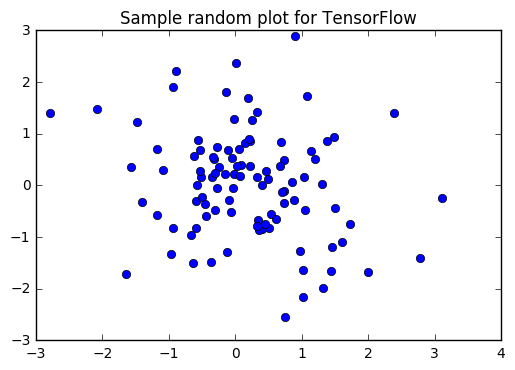

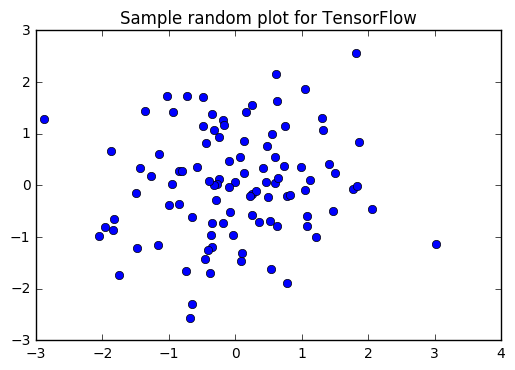

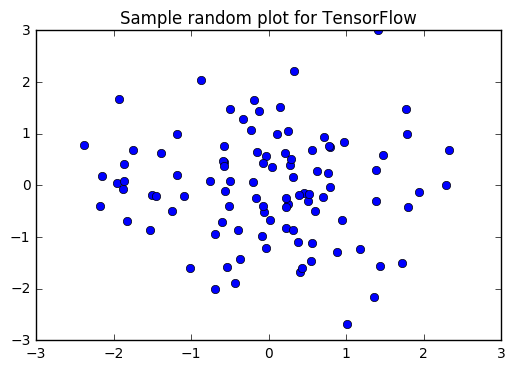

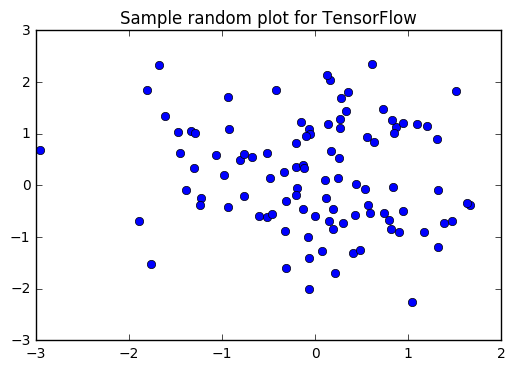

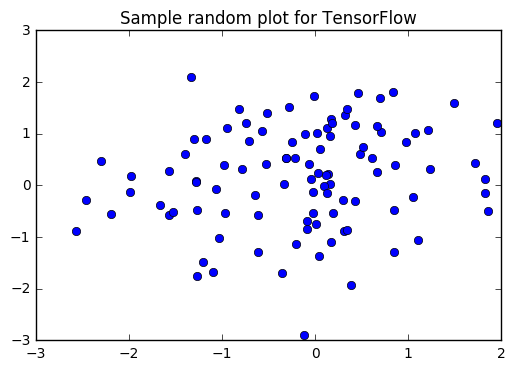

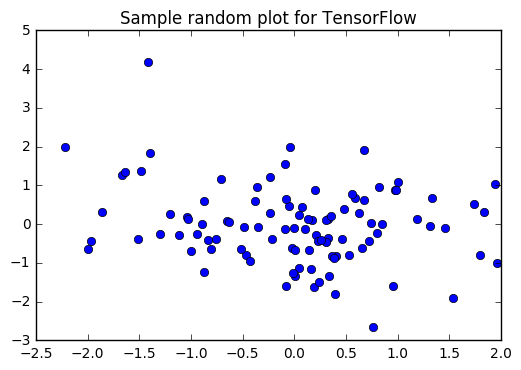

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
with tf.Session() as sess:
    fit, ax = plt.subplots()
    ax.plot(tf.random_normal([100]).eval(), tf.random_normal([100]).eval(),'o')
    ax.set_title('Sample random plot for TensorFlow')
    plt.savefig('result.png')
    plt.show()

In [16]:
# k-means clustering on synthetic datasets
from sklearn.datasets.samples_generator import make_blobs
centers = [(-2,-2), (-2,1.5), (1.5,-2), (2,1.5)]
data, features = make_blobs(n_samples=200, centers=centers, n_features=2,
cluster_std=0.8, shuffle=False, random_state=42)

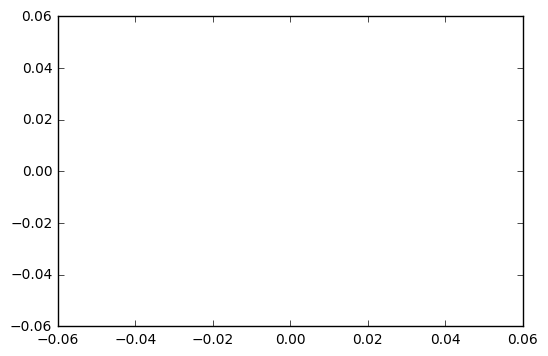

In [20]:
ax.scatter(np.asarray(centers).transpose()[0],
          np.asarray(centers).transpose()[1],marker = 'o', s = 250)
plt.plot()
plt.show()

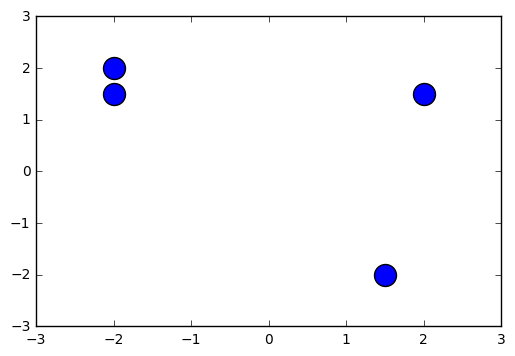

In [22]:
import tensorflow as tf
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

DATA_TYPE = 'blobs'

if (DATA_TYPE == 'circle'):
    K=2
else:
    K=4
MAX_ITERS = 1000
start = time.time()
centers = [(-2,2),(-2,1.5),(1.5,-2),(2,1.5)]
if (DATA_TYPE == 'circle'):
    data, features = make_circles(n_samples=200, shuffle=True, noise=0.01, factor=0.4)
else:
    data, features = make_blobs(n_samples=200,centers=centers, n_features = 2, cluster_std=0.8, 
                               shuffle=False, random_state=42)
fig, ax = plt.subplots()
ax.scatter(np.asarray(centers).transpose()[0],np.asarray(centers).transpose()[1], marker='o', s=250)
plt.show()

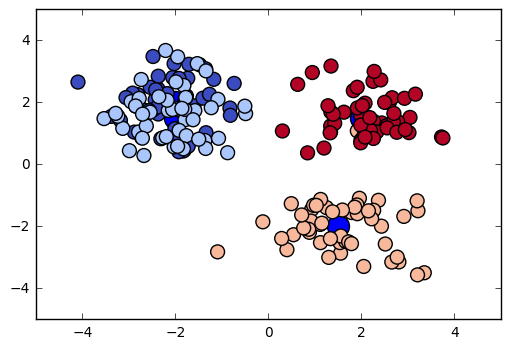

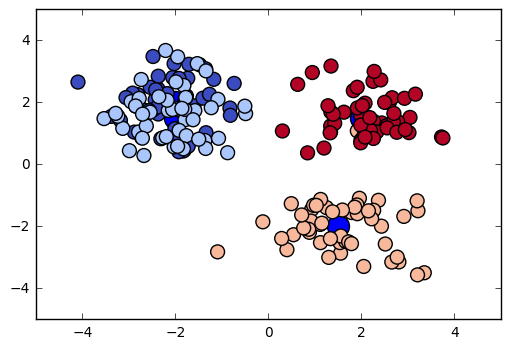

In [24]:
fig, ax = plt.subplots()
if(DATA_TYPE == 'blobs'):
    ax.scatter(np.asarray(centers).transpose()[0],np.asarray(centers).transpose()[1], marker='o',s=250)
#else:
    ax.scatter(data.transpose()[0],data.transpose()[1],marker='o',s=100,c=features,cmap=plt.cm.coolwarm)
plt.plot()
plt.show()

In [ ]:
points = tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([200],dtype=tf.int64))
centroids = tf.Variable(tf.slice(points.initialized_value(),[0,0],[K,2]))

sess = tf.Session()
sess.run(tf.initialize_all_variables())

rep_centroids = tf.reshape(tf.tile(centroids, [200,1]),[200,K,2])
rep_points = tf.reshape(tf.tile(points, [1,K]),[200,K,2])
sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids),
                           reduction_indices=2)
best_centroids = tf.argmin(sum_squares, 1)
did_assignments_change = tf.reduce_any(tf.not_equal(best_centroids, cluster_assignments))

def bucket_mean(data, bucket_ids, num_buckets):
    total = tf.unsorted_segment_sum(data, bucket_ids, num_buckets)
    count = tf.unsorted_segment_sum(tf.ones_like(data),bucket_ids,num_buckets)
    return total/count

means = bucket_mean(points, best_centroids, K)

with tf.control_dependencies([did_assignments_change]):
    do_updates = tf.group(centroids.assign(means),
                         cluster_assignments.assign(best_centroids))
changed = True
iters = 0
fig, ax = plt.subplots()
if (DATA_TYPE =='blobs'):
    colourindexes=[2,1,4,3]
else:
    colourindexes=[2,1]
while changed and iters < MAX_ITERS:
    fig, ax = plt.subplots()
    iters += 1
[changed,_] = sess.run([did_assignments_change,do_updates])
[centers,assignments]=sess.run([centroids,cluster_assignments])
ax.scatter(sess.run(points).transpose()[0],sess.run(points).transpose()[1],
              marker = 'o',s=200,c=assignments,cmap=plt.cm.coolwarm)

ax.scatter(centers[:,0],centers[:,1],marker='^',s=550,c=colourindexes,
              cmap=plt.cm.plasma)
ax.set_title('Iteration'+str(iters))
plt.savefig("kmeans"+str(iters)+".png")

ax.scatter(sess. run(points).transpose()[0],sess.run(points).transpose()[1],
                                      marker='o',s=200,c=assignments,cmap=plt.cm.coolwarm)
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Instructions for updating:
Use `tf.global_variables_initializer` instead.
[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]


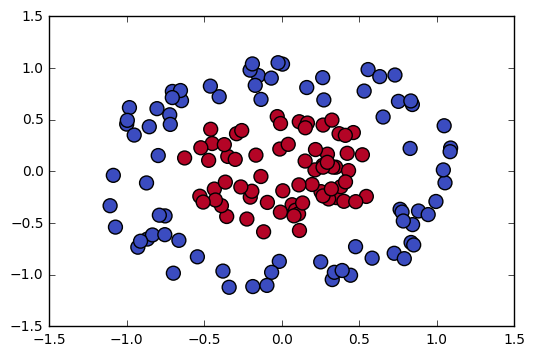

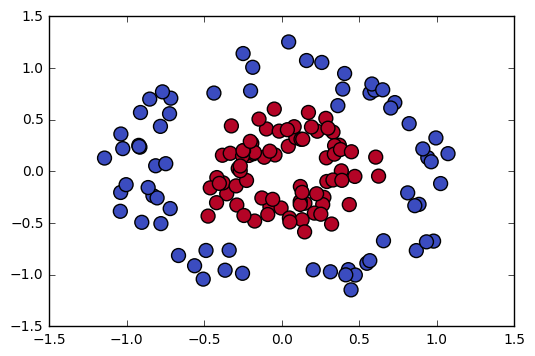

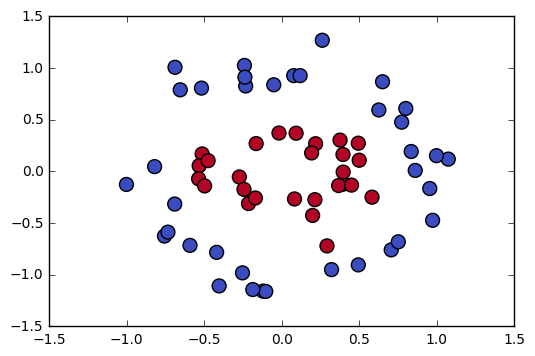

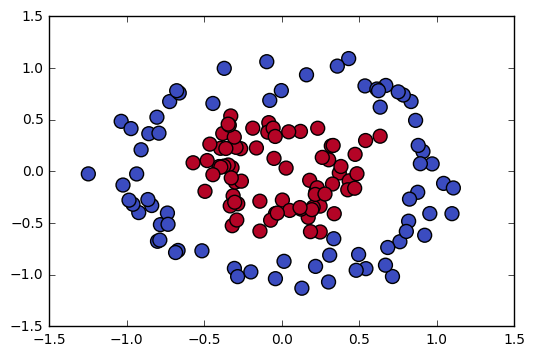

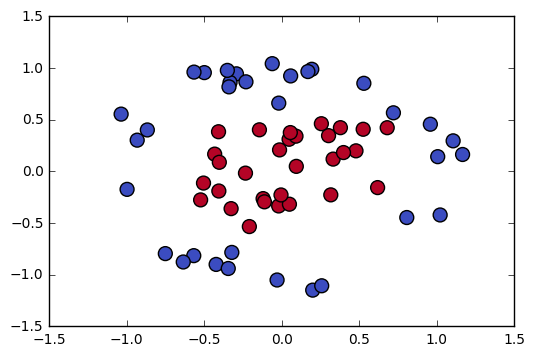

Found in 2.32 seconds
Cluster assignments: [1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]


In [3]:
import tensorflow as tf
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles

N=210
K=2
MAX_ITERS = 1000
cut=int(N*0.7)
start = time.time()

data, features = make_circles(n_samples=N,shuffle=True,noise=0.12,
                             factor=0.4)
tr_data,tr_features=data[:cut],features[:cut]
te_data,te_features=data[cut:],features[cut:]
test=[]

fig,ax = plt.subplots()
ax.scatter(tr_data.transpose()[0],tr_data.transpose()[1],marker='o',
                            s=100,c=tr_features,cmap=plt.cm.coolwarm)
plt.plot()

sess=tf.Session()
sess.run(tf.initialize_all_variables())

for i,j in zip(te_data,te_features):
    distances=tf.reduce_sum(tf.square(tf.subtract(i,tr_data)),reduction_indices=1)
    neighbor=tf.arg_min(distances,0)
    test.append(tr_features[sess.run(neighbor)])
print(test)

fig, ax = plt.subplots()
ax.scatter(te_data.transpose()[0],te_data.transpose()[1],marker='o',s=100,
          c=test,cmap=plt.cm.coolwarm)
plt.plot()
plt.show()

end=time.time()
print('Found in %.2f seconds' % (end-start))
print('Cluster assignments:', test)